In [34]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib import rc
rc('font', family = 'AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [35]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
import requests
import urllib
import time

In [36]:
html = 'http://kin.naver.com/search/list.nhn?query={key_word}&page={num}'

req = Request(html.format(num=1, key_word=urllib.parse.quote('저녁 메뉴')));
req.add_header('Referer', 'http://www.naver.com/')

response = urlopen(req)

soup = BeautifulSoup(response, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta contents="always" name="referrer"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="저녁 메뉴의 지식iN Q&amp;A 검색결과입니다. 궁금증을 해결하지 못했다면 지식iN '질문하기'를 해보세요." name="description">
<meta content="width=1024" name="viewport"/>
<meta content="none" name="msapplication-config">
<link href="https://ssl.pstatic.net/static.kin/static/pc/20221117140227/css/min/common.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.kin/static/pc/20221117140227/css/min/components.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.kin/static/pc/20221117140227/css/min/other.css" rel="stylesheet" type="text/css"/>
<script>
	
	var pcDomain = "kin.naver.com";
	var pcDomainWithProtocol = "https://kin.naver.com";
	var pcKinServiceProtocol = "https";

	var mobileDomain = "m.kin.naver.com";
	var mobileDomainWithProtocol = "https://m.kin.naver.com";
	var mobileKinServiceProtocol = "https";

	var upl

In [37]:
links = soup.find_all('dt')
links[0]

<dt>
<a class="_nclicks:kin.txt _searchListTitleAnchor" href="https://kin.naver.com/qna/detail.naver?d1id=12&amp;dirId=12093120&amp;docId=428538011&amp;qb=7KCA64WBIOuplOuJtA==&amp;enc=utf8§ion=kin&amp;rank=1&amp;search_sort=0&amp;spq=0" target="_blank"><b>저녁메뉴</b> 추천</a>
</dt>

In [38]:
links[0].a['href']

'https://kin.naver.com/qna/detail.naver?d1id=12&dirId=12093120&docId=428538011&qb=7KCA64WBIOuplOuJtA==&enc=utf8§ion=kin&rank=1&search_sort=0&spq=0'

In [39]:
html = links[0].a['href']

r = requests.get(links[0].a['href'])
soup_tmp = BeautifulSoup(r.text, 'html.parser')

soup_tmp


<!DOCTYPE html>

<html lang="ko">
<head>
<meta contents="always" name="referrer"/>
<meta content="width=1024" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="none" name="msapplication-config">
<meta content="noindex,nofollow" name="robots">
<meta content="저녁메뉴 추천" property="og:title">
<meta content="https://kin.naver.com/qna/detail.nhn?d1id=12&amp;dirId=12093120&amp;docId=428538011&amp;qb=7KCA64WBIOuplOuJtA==&amp;enc=utf8%C2%A7ion=kin&amp;rank=1&amp;search_sort=0&amp;spq=0" property="og:url">
<meta content="https://ssl.pstatic.net/static/kin/common/kin_thumbnail_new_w1000.png" property="og:image"/>
<meta content="오늘 저녁 메뉴 추천 해주세요" property="og:description"/>
<meta content="네이버 지식iN" property="og:article:author"/>
<meta content="https://kin.naver.com" property="og:article:author:url"/>
<title>
		저녁메뉴 추천 : 지식iN
	</title>
<link href="/favicon.ico?v=2.4" rel="shortcut icon" type="i

In [40]:
soup_tmp.find_all('div', '_endContentsText')

[<div class="_endContentsText c-heading-answer__content-user"><div class="se-viewer se-theme-default" lang="ko-KR"> <!-- SE_DOC_HEADER_START --> <!--@CONTENTS_HEADER--> <!-- SE_DOC_HEADER_END --> <div class="se-main-container"> <div class="se-component se-text se-l-default" id="SE-a505d688-c179-4a27-bb23-4b7f68fa4c6a"> <div class="se-component-content"> <div class="se-section se-section-text se-l-default"> <div class="se-module se-module-text"> <!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragraph-align-" id="SE-700a1315-df51-4c42-8237-e9b755e46ccd" style=""><span class="se-fs- se-ff- se-style-unset" id="SE-a18b318a-c536-485f-ac41-8229bf333b9b" style="">'김치볶음밥'</span></p><!-- } SE-TEXT --><!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragraph-align-" id="SE-01efa901-e575-4138-a71e-78a99071935c" style=""><span class="se-fs- se-ff- se-style-unset" id="SE-bca37864-9486-44a6-95d0-f724dad88fe2" style=""> </span></p><!-- } SE-TEXT --><!-- SE-TEXT { --><p class="se-text-par

In [41]:
contents = []

search_result = soup_tmp.find_all('div', '_endContentsText')

for each in search_result:
    contents.append(each.get_text())

contents

["         '김치볶음밥' \u200b               요리재료   밥400g, 다진돼지고기100g, 배추김치140g, 게란2개, 대파60g, 고춧가루1T,  간장1T, 설탕1T, 통깨                          조리방법   1. 팬에 기름두르고 달걀후라이 만들기 \u200b 2. 배추김치 가위로 작게 자르기, 대파 송송썰기 \u200b 3. 팬에 기름 넉넉히 두르고 대파, 돼지고기 넣고 볶기   4. 김치, 고춧가루, 설탕을 넣고 볶은 뒤 간장 넣고 섞기  \u200b \u200b 5. 불 끄고 밥 넣고 골고루 섞은뒤 센불에서 볶기 \u200b 6. 접시위에 볶음밥과 달걀후라이 올려주면 완성!            \u200b     ",
 '         로제 떡볶이 먹어요!!!     ',
 '         1.오늘 저녁 메뉴 추천 해주세요= 저는 분식을 추천드리고 싶네요.코로나 조심하시고 좋은하루 되세요.     ',
 '         저녁이니까 달달하게 족발 + 보쌈..!?     ',
 '         마라탕에 엽떡까지 말아서 먹어보기!     ']

In [42]:
from tqdm.notebook import tqdm
import time

present_candi_text = []

for each_link in tqdm(links):
    r = requests.get(each_link.a['href'])
    soup_tmp = BeautifulSoup(r.text, 'html.parser')

    search_result = soup_tmp.find_all('div', '_endContentsText')

    time.sleep(0.1)

    for each in search_result:
        present_candi_text.append(each.get_text())

  0%|          | 0/10 [00:00<?, ?it/s]

In [43]:
present_candi_text

["         '김치볶음밥' \u200b               요리재료   밥400g, 다진돼지고기100g, 배추김치140g, 게란2개, 대파60g, 고춧가루1T,  간장1T, 설탕1T, 통깨                          조리방법   1. 팬에 기름두르고 달걀후라이 만들기 \u200b 2. 배추김치 가위로 작게 자르기, 대파 송송썰기 \u200b 3. 팬에 기름 넉넉히 두르고 대파, 돼지고기 넣고 볶기   4. 김치, 고춧가루, 설탕을 넣고 볶은 뒤 간장 넣고 섞기  \u200b \u200b 5. 불 끄고 밥 넣고 골고루 섞은뒤 센불에서 볶기 \u200b 6. 접시위에 볶음밥과 달걀후라이 올려주면 완성!            \u200b     ",
 '         로제 떡볶이 먹어요!!!     ',
 '         1.오늘 저녁 메뉴 추천 해주세요= 저는 분식을 추천드리고 싶네요.코로나 조심하시고 좋은하루 되세요.     ',
 '         저녁이니까 달달하게 족발 + 보쌈..!?     ',
 '         마라탕에 엽떡까지 말아서 먹어보기!     ',
 '         계란이들어간 계란찜이나 된장찌개도 괜찮고 아니면 시금치 볶음도 나쁘지는 않습니다.반찬종류로 저녁을드셔보시는건 어떠실까요? 저는 저녁메뉴는 어머니가 정해주셔서 저는 괜찮은것같습니다.글쓴이님께서 저녁메뉴 결정하시기 어려우시다면 부모님께도움을 청해보는건 어떠실까용?부모님은 저녁메뉴에대해서 친절히 알려주시고 같이 결정해주시니 아마 저녁메뉴는 결정하시는데에는 어려움이 없으실거라 믿어봅니다. 저의답변이 도움이되시길 바라며 오늘하루도 즐겁게 보내세요^^감사합니다.     ',
 '         감자탕     ',
 '         저는 삼겹살이 땡깁니다.     ',
 '         \u200b오늘 그래도 명절 전날인데\u200b고기 먹어야죠.\u200b요즘 1인구성 잘나오는 곳 많으니까\u200b소불고기 / 돼지불고기 + 김치찌개 / 된장찌개 + 밑

In [44]:
import nltk
from konlpy.tag import Okt; t = Okt()

In [45]:
present_text = ''

for each_line in present_candi_text:
    present_text = present_text + each_line + '\n'

In [46]:
tokens_ko = t.nouns(present_text)
tokens_ko

['김치볶음밥',
 '요리',
 '재료',
 '밥',
 '돼지고기',
 '배추김치',
 '게란',
 '개',
 '대파',
 '고춧가루',
 '간장',
 '설탕',
 '통깨',
 '조리',
 '방법',
 '팬',
 '기름',
 '달걀후라이',
 '만들기',
 '배추김치',
 '가위',
 '대파',
 '송송',
 '팬',
 '기름',
 '대파',
 '돼지고기',
 '김치',
 '고춧가루',
 '설탕',
 '뒤',
 '간장',
 '불',
 '밥',
 '뒤',
 '불',
 '접',
 '시위',
 '볶음밥',
 '달걀후라이',
 '완성',
 '로제',
 '떡볶이',
 '오늘',
 '저녁',
 '메뉴',
 '추천',
 '저',
 '분식',
 '추천',
 '코로나',
 '하루',
 '저녁',
 '달달',
 '족발',
 '보쌈',
 '탕',
 '엽떡',
 '보기',
 '계란',
 '계란찜',
 '된장찌개',
 '시금치',
 '볶음',
 '반찬',
 '종류',
 '저녁',
 '요',
 '저',
 '저녁',
 '메뉴',
 '어머니',
 '정',
 '저',
 '것',
 '글쓴이님',
 '저녁',
 '메뉴',
 '결정',
 '부모님',
 '도움',
 '청',
 '용',
 '부모님',
 '저녁',
 '메뉴',
 '대해',
 '결정',
 '아마',
 '저녁',
 '메뉴',
 '결정',
 '어려움',
 '의',
 '답변',
 '도움',
 '오늘',
 '하루',
 '감자탕',
 '저',
 '삼겹살',
 '오늘',
 '명절',
 '전날',
 '고기',
 '요즘',
 '인구',
 '곳',
 '불고기',
 '돼지',
 '불고기',
 '김치찌개',
 '된장찌개',
 '밑반찬',
 '종',
 '식',
 '곳',
 '정말',
 '배달',
 '어플',
 '인',
 '보쌈',
 '정식',
 '가즈',
 '김밥',
 '오므라이스',
 '볶음밥',
 '추천',
 '해',
 '수도',
 '마트',
 '가면',
 '밀',
 '키트',
 '순두부찌개',
 '저녁',
 '메뉴',
 '하니',
 '찜',
 '찜닭'

In [47]:
ko = nltk.Text(tokens_ko, name='저녁 메뉴')
print(len(ko.tokens))
print(len(set(ko.tokens)))

640
368


In [48]:
ko = nltk.Text(tokens_ko, name = '저녁 메뉴')
ko.vocab().most_common(100)

[('저녁', 12),
 ('추천', 11),
 ('치킨', 9),
 ('떡볶이', 8),
 ('메뉴', 8),
 ('족발', 7),
 ('부대찌개', 7),
 ('밥', 6),
 ('볶음밥', 6),
 ('저', 6),
 ('살', 6),
 ('요리', 5),
 ('보쌈', 5),
 ('계란', 5),
 ('것', 5),
 ('밀', 5),
 ('키트', 5),
 ('샐러드', 5),
 ('고구마', 5),
 ('등', 5),
 ('개', 4),
 ('오늘', 4),
 ('탕', 4),
 ('도움', 4),
 ('고기', 4),
 ('피자', 4),
 ('제', 4),
 ('파스타', 4),
 ('쿠폰', 4),
 ('음식', 4),
 ('츠', 4),
 ('야채', 4),
 ('수', 4),
 ('재료', 3),
 ('돼지고기', 3),
 ('대파', 3),
 ('반찬', 3),
 ('요', 3),
 ('결정', 3),
 ('삼겹살', 3),
 ('김치찌개', 3),
 ('비빔밥', 3),
 ('룰렛', 3),
 ('쿠팡', 3),
 ('참여', 3),
 ('연어', 3),
 ('식단', 3),
 ('닭', 3),
 ('가슴', 3),
 ('두부', 3),
 ('관리', 3),
 ('지역', 3),
 ('그랜드', 3),
 ('라이프', 3),
 ('김치볶음밥', 2),
 ('배추김치', 2),
 ('고춧가루', 2),
 ('간장', 2),
 ('설탕', 2),
 ('조리', 2),
 ('방법', 2),
 ('팬', 2),
 ('기름', 2),
 ('달걀후라이', 2),
 ('김치', 2),
 ('뒤', 2),
 ('불', 2),
 ('하루', 2),
 ('된장찌개', 2),
 ('볶음', 2),
 ('부모님', 2),
 ('용', 2),
 ('감자탕', 2),
 ('곳', 2),
 ('불고기', 2),
 ('식', 2),
 ('배달', 2),
 ('오므라이스', 2),
 ('해', 2),
 ('순두부찌개', 2),
 ('닭발', 2),
 ('소주', 2)

In [49]:
ko.similar('메뉴')

In [50]:
stop_words = ['저', '살', '요리', '등', '개', '오늘', '도움', '제', '쿠폰', '츠', '수', '요', '결정', '룰렛', '쿠팡', '참여', '가슴', '관리', '지역', '그랜드', '라이프', '뒤', '부모님', '용', '곳', '식', '해', '중', '하나', '할인', '최대', '선물', '도착', '지금', '최고']

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name = '저녁 메뉴')
ko.vocab().most_common(50)

[('저녁', 12),
 ('추천', 11),
 ('치킨', 9),
 ('떡볶이', 8),
 ('메뉴', 8),
 ('족발', 7),
 ('부대찌개', 7),
 ('밥', 6),
 ('볶음밥', 6),
 ('보쌈', 5),
 ('계란', 5),
 ('것', 5),
 ('밀', 5),
 ('키트', 5),
 ('샐러드', 5),
 ('고구마', 5),
 ('탕', 4),
 ('고기', 4),
 ('피자', 4),
 ('파스타', 4),
 ('음식', 4),
 ('야채', 4),
 ('재료', 3),
 ('돼지고기', 3),
 ('대파', 3),
 ('반찬', 3),
 ('삼겹살', 3),
 ('김치찌개', 3),
 ('비빔밥', 3),
 ('연어', 3),
 ('식단', 3),
 ('닭', 3),
 ('두부', 3),
 ('김치볶음밥', 2),
 ('배추김치', 2),
 ('고춧가루', 2),
 ('간장', 2),
 ('설탕', 2),
 ('조리', 2),
 ('방법', 2),
 ('팬', 2),
 ('기름', 2),
 ('달걀후라이', 2),
 ('김치', 2),
 ('불', 2),
 ('하루', 2),
 ('된장찌개', 2),
 ('볶음', 2),
 ('감자탕', 2),
 ('불고기', 2)]

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

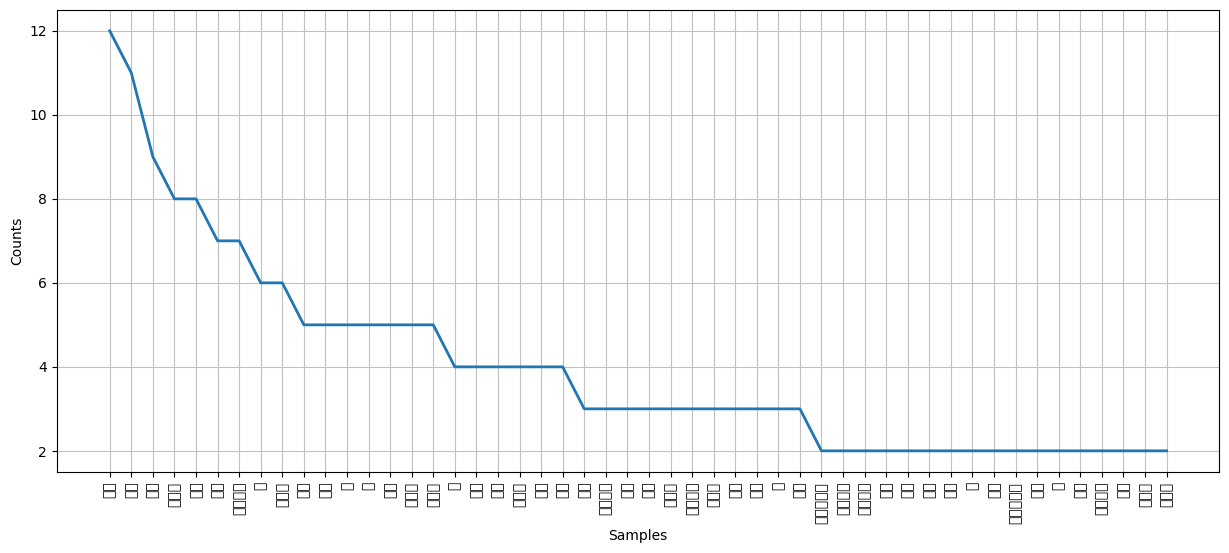

In [51]:
plt.figure(figsize=(15, 6))
ko.plot(50)
plt.show()

In [52]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

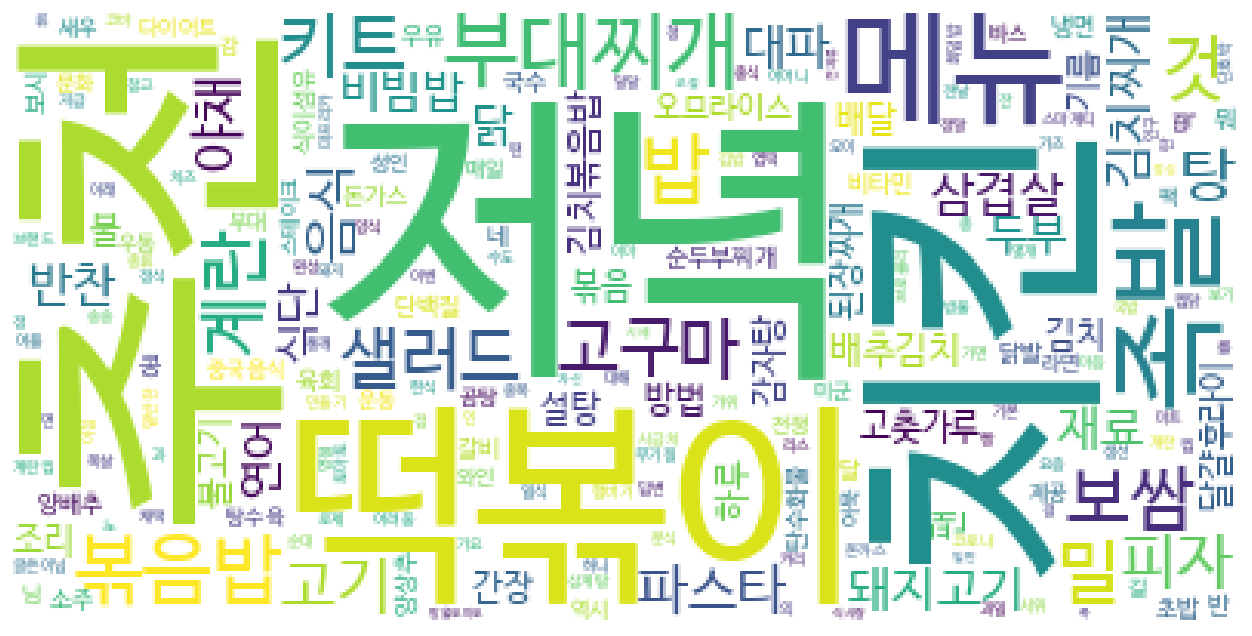

In [54]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path='/Library/Fonts/NanumBarunGothic.ttf', relative_scaling = 0.5, background_color='white',).generate_from_frequencies(dict(data))
plt.figure(figsize = (16, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [56]:
from tqdm import tqdm_notebook
import time

links = []
html = 'http://kin.naver.com/search/list.nhn?query={key_word}&page={num}'

for n in tqdm(range(1, 10)):
    req = Request(html.format(num=n, key_word=urllib.parse.quote('저녁 메뉴')));
    req.add_header('Referer', 'http://www.naver.com/')
    response = urlopen(req)
    soup = BeautifulSoup(response, "html.parser")

    links.extend(soup.find_all('dt'))

links

  0%|          | 0/9 [00:00<?, ?it/s]

[<dt>
 <a class="_nclicks:kin.txt _searchListTitleAnchor" href="https://kin.naver.com/qna/detail.naver?d1id=12&amp;dirId=12093120&amp;docId=428538011&amp;qb=7KCA64WBIOuplOuJtA==&amp;enc=utf8§ion=kin&amp;rank=1&amp;search_sort=0&amp;spq=0" target="_blank"><b>저녁메뉴</b> 추천</a>
 </dt>,
 <dt>
 <a class="_nclicks:kin.txt _searchListTitleAnchor" href="https://kin.naver.com/qna/detail.naver?d1id=2&amp;dirId=20303&amp;docId=430177880&amp;qb=7KCA64WBIOuplOuJtA==&amp;enc=utf8§ion=kin&amp;rank=2&amp;search_sort=0&amp;spq=0" target="_blank"><b>저녁메뉴</b> 추천해주쎄용!</a>
 </dt>,
 <dt>
 <a class="_nclicks:kin.txt _searchListTitleAnchor" href="https://kin.naver.com/qna/detail.naver?d1id=8&amp;dirId=80101&amp;docId=427962620&amp;qb=7KCA64WBIOuplOuJtA==&amp;enc=utf8§ion=kin&amp;rank=3&amp;search_sort=0&amp;spq=0" target="_blank">직장인 <b>저녁메뉴</b> 추천해주세요! 1인</a>
 </dt>,
 <dt>
 <a class="_nclicks:kin.txt _searchListTitleAnchor" href="https://kin.naver.com/qna/detail.naver?d1id=8&amp;dirId=80208&amp;docId=426808665

In [57]:
present_candi_text = []

for each_link in tqdm(links):
    r = requests.get(each_link.a['href'])
    soup_tmp = BeautifulSoup(r.text, 'html.parser')

    search_result = soup_tmp.find_all('div', '_endContentsText')
    time.sleep(0.5)

    for each in search_result:
        present_candi_text.append(each.get_text())

  0%|          | 0/90 [00:00<?, ?it/s]

In [58]:
present_candi_text

["         '김치볶음밥' \u200b               요리재료   밥400g, 다진돼지고기100g, 배추김치140g, 게란2개, 대파60g, 고춧가루1T,  간장1T, 설탕1T, 통깨                          조리방법   1. 팬에 기름두르고 달걀후라이 만들기 \u200b 2. 배추김치 가위로 작게 자르기, 대파 송송썰기 \u200b 3. 팬에 기름 넉넉히 두르고 대파, 돼지고기 넣고 볶기   4. 김치, 고춧가루, 설탕을 넣고 볶은 뒤 간장 넣고 섞기  \u200b \u200b 5. 불 끄고 밥 넣고 골고루 섞은뒤 센불에서 볶기 \u200b 6. 접시위에 볶음밥과 달걀후라이 올려주면 완성!            \u200b     ",
 '         로제 떡볶이 먹어요!!!     ',
 '         1.오늘 저녁 메뉴 추천 해주세요= 저는 분식을 추천드리고 싶네요.코로나 조심하시고 좋은하루 되세요.     ',
 '         저녁이니까 달달하게 족발 + 보쌈..!?     ',
 '         마라탕에 엽떡까지 말아서 먹어보기!     ',
 '         계란이들어간 계란찜이나 된장찌개도 괜찮고 아니면 시금치 볶음도 나쁘지는 않습니다.반찬종류로 저녁을드셔보시는건 어떠실까요? 저는 저녁메뉴는 어머니가 정해주셔서 저는 괜찮은것같습니다.글쓴이님께서 저녁메뉴 결정하시기 어려우시다면 부모님께도움을 청해보는건 어떠실까용?부모님은 저녁메뉴에대해서 친절히 알려주시고 같이 결정해주시니 아마 저녁메뉴는 결정하시는데에는 어려움이 없으실거라 믿어봅니다. 저의답변이 도움이되시길 바라며 오늘하루도 즐겁게 보내세요^^감사합니다.     ',
 '         감자탕     ',
 '         저는 삼겹살이 땡깁니다.     ',
 '         \u200b오늘 그래도 명절 전날인데\u200b고기 먹어야죠.\u200b요즘 1인구성 잘나오는 곳 많으니까\u200b소불고기 / 돼지불고기 + 김치찌개 / 된장찌개 + 밑

In [59]:
present_tet = ''

for each_line in present_candi_text:
    present_text = present_text + each_line + '\n'

In [60]:
tokens_ko = t.nouns(present_text)
ko = nltk.Text(tokens_ko, name = '저녁 메뉴')
ko.vocab().most_common(100)

[('추천', 184),
 ('치킨', 157),
 ('살', 134),
 ('저녁', 116),
 ('메뉴', 102),
 ('저', 72),
 ('떡볶이', 65),
 ('치즈', 58),
 ('밥', 54),
 ('코로나', 51),
 ('음식', 51),
 ('하루', 49),
 ('탕', 47),
 ('쿠폰', 43),
 ('오늘', 37),
 ('수', 37),
 ('것', 35),
 ('돈까스', 33),
 ('츠', 32),
 ('지금', 31),
 ('배달', 30),
 ('부대찌개', 30),
 ('개', 29),
 ('불고기', 28),
 ('간장', 27),
 ('족발', 26),
 ('피자', 26),
 ('세트', 26),
 ('선물', 25),
 ('볶음', 24),
 ('삼겹살', 24),
 ('과메기', 24),
 ('김치', 23),
 ('볶음밥', 23),
 ('룰렛', 23),
 ('쿠팡', 23),
 ('등', 23),
 ('김치찌개', 22),
 ('닭', 22),
 ('맛', 22),
 ('참여', 21),
 ('요', 20),
 ('계란', 19),
 ('할인', 19),
 ('전골', 19),
 ('치즈볼', 19),
 ('최대', 18),
 ('곱창', 18),
 ('요리', 17),
 ('보쌈', 17),
 ('밀', 17),
 ('키트', 17),
 ('뭐', 17),
 ('닭볶음탕', 17),
 ('김치볶음밥', 16),
 ('닭발', 16),
 ('도착', 16),
 ('지역', 16),
 ('수수료', 16),
 ('고민', 16),
 ('곱', 16),
 ('싸이', 16),
 ('좀', 16),
 ('맘', 16),
 ('성분', 16),
 ('순두부찌개', 15),
 ('제', 15),
 ('샐러드', 15),
 ('제공', 15),
 ('냉동', 15),
 ('고추', 15),
 ('양념', 15),
 ('도리', 15),
 ('고기', 14),
 ('요즘', 14),
 ('국밥', 14),
 ('

In [61]:
ko.similar('저녁 메뉴')

No matches


In [62]:
stop_words = ['저', '살', '요리', '등', '개', '오늘', '도움', '제', '쿠폰', '츠', '수', '요', '결정', '룰렛', '쿠팡', '참여','코로나', '또', '가슴', '관리', '지역', '그랜드', '라이프', '뒤', '부모님', '용', '곳', '식', '해', '중', '하나', '할인', '최대', '선물', '도착', '지금', '최고']

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name = '저녁 메뉴')
ko.vocab().most_common(50)

[('추천', 184),
 ('치킨', 157),
 ('저녁', 116),
 ('메뉴', 102),
 ('떡볶이', 65),
 ('치즈', 58),
 ('밥', 54),
 ('음식', 51),
 ('하루', 49),
 ('탕', 47),
 ('것', 35),
 ('돈까스', 33),
 ('배달', 30),
 ('부대찌개', 30),
 ('불고기', 28),
 ('간장', 27),
 ('족발', 26),
 ('피자', 26),
 ('세트', 26),
 ('볶음', 24),
 ('삼겹살', 24),
 ('과메기', 24),
 ('김치', 23),
 ('볶음밥', 23),
 ('김치찌개', 22),
 ('닭', 22),
 ('맛', 22),
 ('계란', 19),
 ('전골', 19),
 ('치즈볼', 19),
 ('곱창', 18),
 ('보쌈', 17),
 ('밀', 17),
 ('키트', 17),
 ('뭐', 17),
 ('닭볶음탕', 17),
 ('김치볶음밥', 16),
 ('닭발', 16),
 ('수수료', 16),
 ('고민', 16),
 ('곱', 16),
 ('싸이', 16),
 ('좀', 16),
 ('맘', 16),
 ('성분', 16),
 ('순두부찌개', 15),
 ('샐러드', 15),
 ('제공', 15),
 ('냉동', 15),
 ('고추', 15)]

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
/home/gwon/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gwon/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'AppleGothic' not found.
/home/gwon/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gwon/venv/nltk/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53416 (\N{HANGUL SYLLABLE KIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'AppleGothic' not found.
/home/gwo

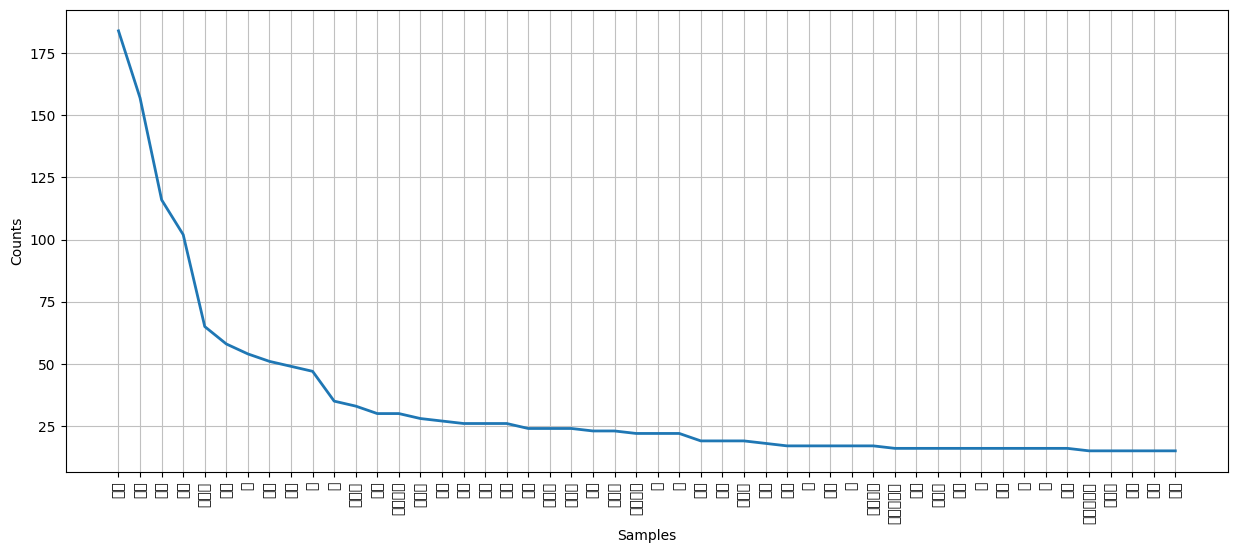

In [63]:
plt.figure(figsize=(15, 6))
ko.plot(50)
plt.show()

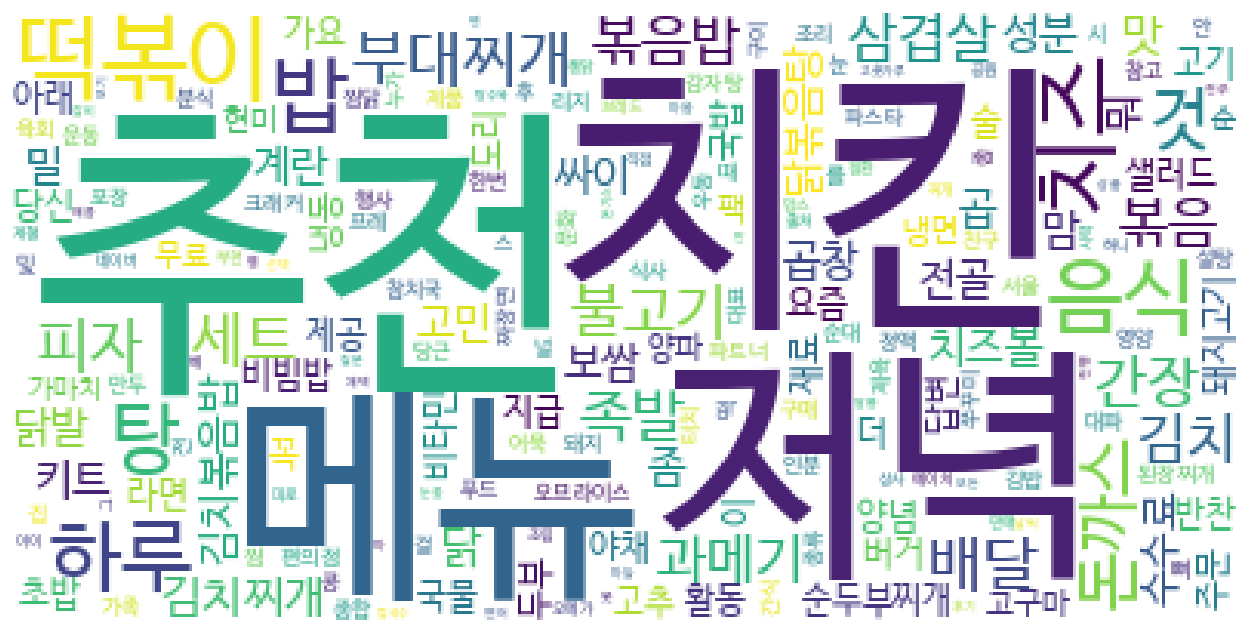

In [64]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path='/Library/Fonts/NanumBarunGothic.ttf', relative_scaling = 0.5, background_color='white',).generate_from_frequencies(dict(data))
plt.figure(figsize = (16, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [65]:
import gensim
from gensim.models import word2vec

In [67]:
twitter = Okt()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm = True, stem = True)
    r=[]

    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])

    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)

김치볶음밥 ​ 요리 재료 밥 400 g 다지다 돼지고기 100 g 배추김치 140 g 게란 2 개 대파 60 g 고춧가루 1 T 간장 1 T 설탕 1 T 통깨 조리 방법 1 팬 기름 두르다 달걀후라이 만들기 ​ 2 배추김치 가위 작다 자르다 대파 송송 썰다 ​ 3 팬 기름 넉넉하다 두르다 대파 돼지고기 넣다 볶다 4 김치 고춧가루 설탕 넣다 볶다 뒤 간장 넣다 섞다 ​ ​ 5 불 끄다 밥 넣다 골고루 섞다 뒤 세다 불 볶다 ​ 6 접 시위 볶음밥 달걀후라이 올려주다 완성 ​
로제 떡볶이 먹다
1 오늘 저녁 메뉴 추천 해주다 저 분식 추천 드리다 싶다 코로나 조심하다 좋다 하루 되다
저녁 달달 하다 족발 보쌈
마르다 탕 엽떡 말다 먹다 보기
계란 들어가다 계란찜 된장찌개 괜찮다 아니다 시금치 볶음 나쁘다 않다 반찬 종류 저녁 들다 보다 어떻다 요 저 저녁 메뉴 어머니 정 해주다 저 괜찮다 것 같다 글쓴이님 저녁 메뉴 결정 하다 어리다 부모님 도움 청 해보다 어떻다 용 부모님 저녁 메뉴 대해 친절하다 알다 같이 결정 해주다 아마 저녁 메뉴 결정 하다 어려움 없다 믿다 보다 저 의 답변 도움 되다 바라다 오늘 하루 즐겁다 보내다 감사하다
감자탕
저 삼겹살 땡기다
​ 오늘 그래도 명절 전날 ​ 고기 먹다 ​ 요즘 1 인구 성 잘나오다 곳 많다 ​ 소 불고기 돼지 불고기 김치찌개 된장찌개 밑반찬 3 종 ​ 이런 식 나오다 곳 많다 정말 많다 배달 어플 ​ 이렇다 시키다 들다 좋다
1 인 보쌈 정식 가즈
김밥 오므라이스 또는 볶음밥 추천 드리다 간편하다 해 먹다 수도 있다 마트 가면 밀 키트 파다
뜨끈하다 순두부찌개
저녁 메뉴 맛있다 들다 하니 깔다 두 찜 찜닭 어떻다 가요 아니다 치킨 좋다 햄버거 좋다 피자 좋다 암튼 마음 들다 자다 고르다 맛있다 저녁 들다 좋다
족발 보쌈 ​ 닭발 소주 ​ 김치찌개 ​ 부대찌개 ​ 삼겹살 ​ 목살 ​ 순대 국밥 ​ 치즈 돈가스 ​ 제 먹다 것 리스 트이다
치킨 떡볶이 돈까스 피자 초밥 비빔밥 고기 파스타 샐러드 중 하나 추천 이
순두

In [68]:
data_file = 'pres_girl.data'
with open(data_file, 'w', encoding = 'utf-8') as fp:
    fp.write("\n".join(results))

In [71]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data,window = 10, hs = 1, min_count=2, sg=1)
model.save('pres_girl.model')

In [72]:
model.wv.most_similar(positive=['저녁'])

[('정', 0.9692896604537964),
 ('아무', 0.9644256830215454),
 ('좀', 0.9629497528076172),
 ('저', 0.9622197151184082),
 ('순두부찌개', 0.9614929556846619),
 ('추천', 0.9599687457084656),
 ('되다', 0.9466502666473389),
 ('가볍다', 0.9451351761817932),
 ('드리다', 0.9444354772567749),
 ('가츠동', 0.9395890235900879)]